## Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline

## Read data

In [2]:
spy = pd.read_csv('spy.csv')

In [3]:
spy

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,24.469910,24.469910,24.348169,24.452518,1003200,29,4,4,1,1993
1,1993-02-01,24.469905,24.626429,24.469905,24.626429,480500,1,0,5,2,1993
2,1993-02-02,24.609042,24.695999,24.556867,24.678608,201300,2,1,5,2,1993
3,1993-02-03,24.713386,24.956868,24.695994,24.939476,529400,3,2,5,2,1993
4,1993-02-04,25.026432,25.095998,24.748167,25.043823,531500,4,3,5,2,1993
...,...,...,...,...,...,...,...,...,...,...,...
8116,2025-04-28,551.390015,553.549988,545.020020,550.849976,47613800,28,0,18,4,2025
8117,2025-04-29,548.909973,555.450012,548.549988,554.320007,47775100,29,1,18,4,2025
8118,2025-04-30,547.570007,556.520020,541.520020,554.539978,93101500,30,2,18,4,2025
8119,2025-05-01,560.369995,564.070007,557.859985,558.469971,63186100,1,3,18,5,2025


## Data Preprocessing

In [4]:
spy.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Day,int64
Weekday,int64
Week,int64
Month,int64


In [5]:
spy['Date'] = pd.to_datetime(spy['Date'])

## Data analysis and visualization

In [6]:
features = ['Open','High','Low','Close','Volume']

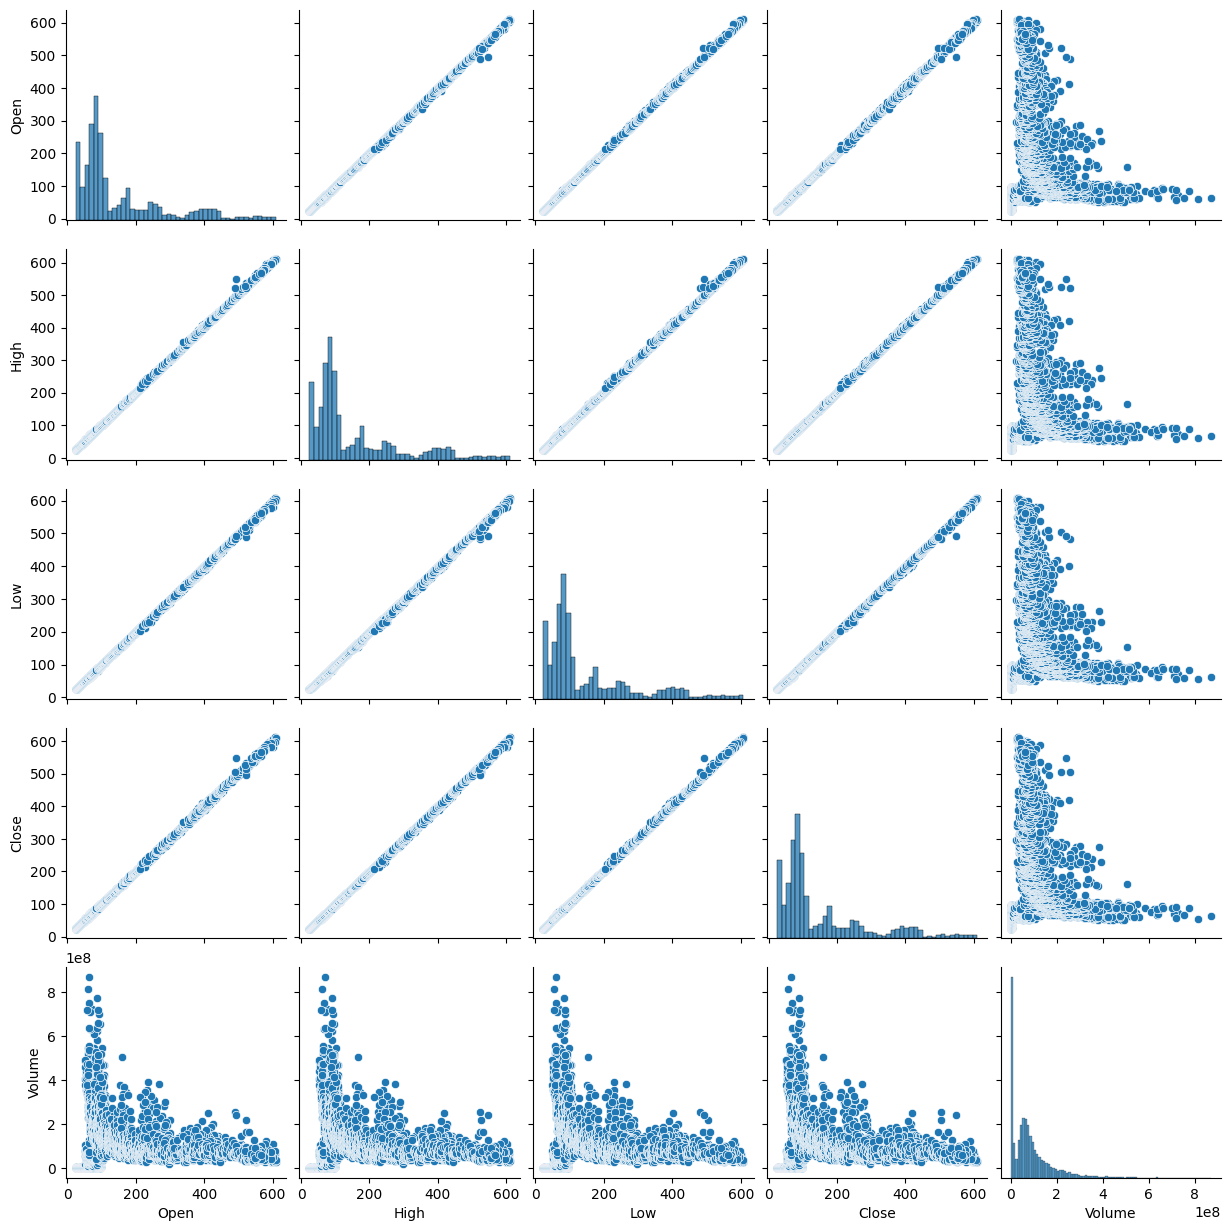

In [7]:
sns.pairplot(spy[features])
plt.show()

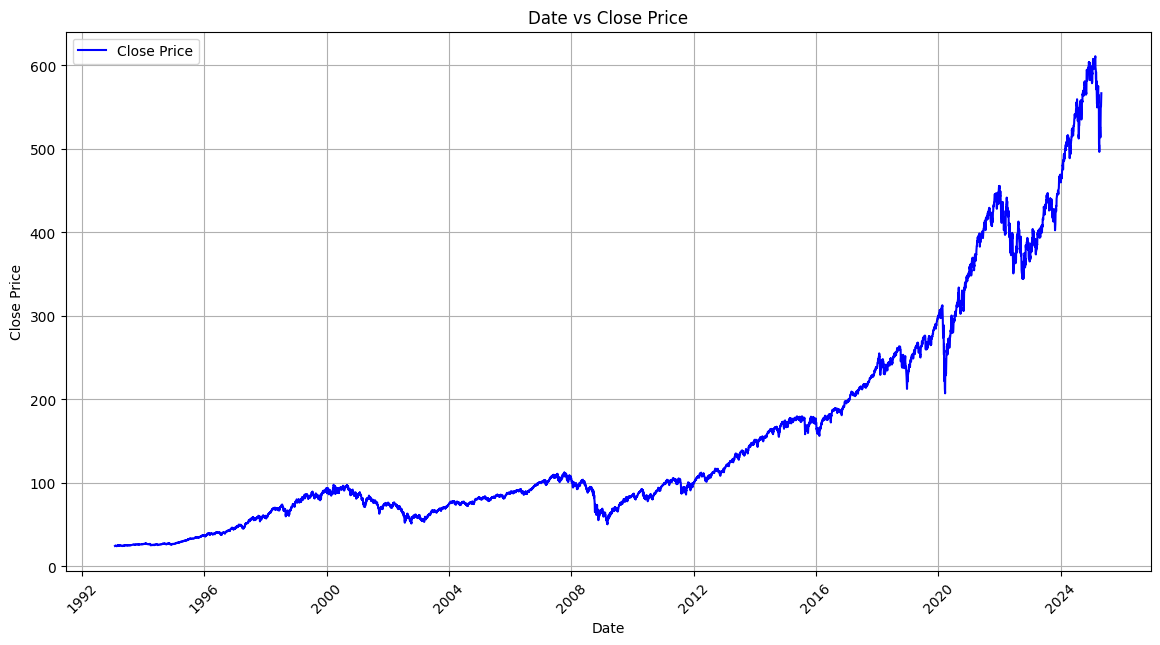

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(spy['Date'], spy['Close'], label='Close Price', color='blue')

plt.title('Date vs Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()

## Model Prediction and Evaluation

In [9]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = spy[features]
y = spy[target]
cv = KFold(n_splits=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

param_grid = {
    'poly_features__degree': [1,2,3] ,
}

grid_search = GridSearchCV(
    estimator=poly_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1
)

grid_search.fit(X, y)

best_degree = grid_search.best_params_['poly_features__degree']
best_mse = -grid_search.best_score_

print(f"Optimal polynomial degree: {best_degree}")
print(f"Cross-validated MSE: {best_mse:.4f}")


Optimal polynomial degree: 1
Cross-validated MSE: 0.6905


## Conclusion


*   Results show that a linear regression (degree=1) is optimal, with a cross-validated MSE of 0.6905. More complex models do not significantly improve predictive accuracy.

*   For further enhancement, it is recommended to introduce technical indicators, macroeconomic data, or consider non-linear machine learning methods.

